## Точечное оценивание и некоторые методы понижения размерности

### Метод моментов

**Задача**: методом моментов найти оценку масштабирующего коэффициента $\theta$ распределения Лапласа, заданного следующим распределением плотности:

$$
f^\theta(x) = \frac{1}{2\theta}e^{-\frac{|x|}{\theta}}
$$

Провести эксперимент при $\theta = 2$: сгенерировать 100 выборок размера 1000. Изобразить на *boxplot* получившиеся оценки параметра для этих 100 выборок. 


Для функция плотности вероятности распределения Лапласа $ f(x) = \frac{\alpha}{2} e^{-\alpha|x-\beta|}$ (где $ -\infty < x < +\infty $, $ \alpha > 0 $ — параметр масштаба, $ \beta $ — параметр сдвига) матожидание и дисперсия равны:

$$
E\xi = \int_{-\infty}^{+\infty} x f(x) dx = \beta
$$

$$
D\xi = E\xi^2 - (E\xi)^2 = \beta^2 + \frac{2}{\alpha^2} - \beta^2 = \frac{2}{\alpha^2}
$$

Выразим из заданного распределения параметры $\alpha$ и $\beta$:

$$\alpha = \frac{1}{\theta}, \beta = 0$$

Первый начальный момент (матожидание) равен нулю, поэтому для оценки $\theta$ используем дисперсию:

$$
D\xi = \frac{2}{\alpha^2} = 2\theta^2
$$

Получаем уравнение для оценки:

$$
2\theta^2 = S^2
$$

$$
\theta = \sqrt{\frac{S^2}{2}}
$$

In [1]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

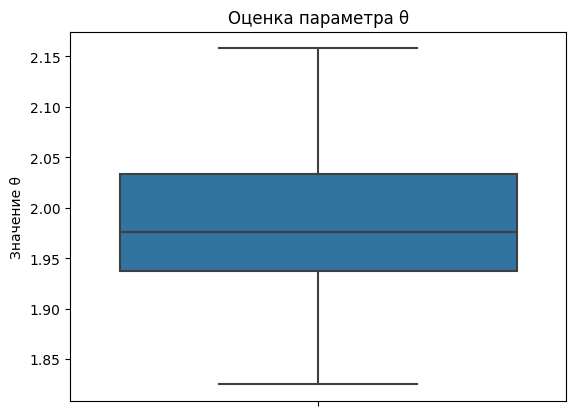

In [2]:
theta = 2

num_samples = 100
sample_size = 1000

samples = np.random.laplace(loc=0, scale=theta, size=(num_samples, sample_size))
theta_estimates = np.sqrt(np.var(samples, ddof=0, axis=1) / 2)

sns.boxplot(y=theta_estimates)
plt.title('Оценка параметра θ')
plt.ylabel('Значение θ')
plt.show()

### Метод максимального правдоподобия

**Задача**: найти оценку максимального правдоподобия случайной величины, заданной распределением плотности:

$$ \frac{3x^2}{\sqrt{2\pi}} \cdot e^{-\frac{(\theta-x^3)^2}{2}} $$

$$ F = \frac{3\overline X^2}{\sqrt{2\pi}} \cdot e^{-\frac{(\widehat\theta-\overline X^3)^2}{2}} $$

$$ L = ln(\frac{3\overline X^2}{\sqrt{2\pi}}) + ln(e^{-\frac{(\widehat\theta-\overline X^3)^2}{2}}) $$

$$ L = ln(3) + 2ln(\overline X) - ln(\sqrt{2\pi}) - \frac{(\widehat\theta - \overline X^3)^2}{2} $$

$$ L'= - \frac{2(\widehat\theta - \overline X^3)}{2} = 0 $$

$$ \widehat\theta =  \overline X^3 $$

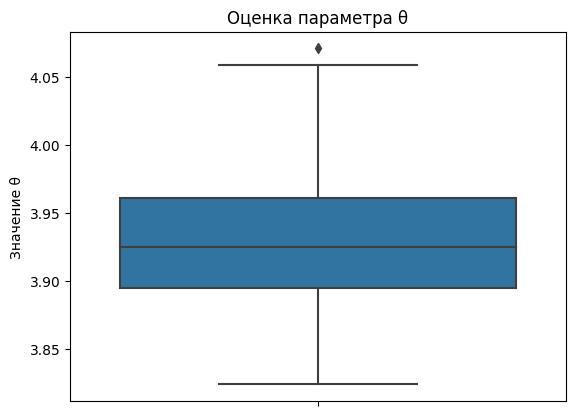

In [11]:
theta = 4

num_samples = 100
sample_size = 1000

class custom_dist(sps.rv_continuous):
    def _pdf(self, x):
        return 3*x**2/np.sqrt(2*np.pi)*np.exp(-(theta-x**3)**2/2)

distr = custom_dist(name='custom_distribution')

samples = distr.rvs(size=(num_samples, sample_size))

theta_estimates = np.mean(samples, axis=1)**3

sns.boxplot(y=theta_estimates)
plt.title('Оценка параметра θ')
plt.ylabel('Значение θ')
plt.show()

### Методы понижения размерности

In [34]:
import pandas as pd
import time
from openTSNE import TSNE as openTSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

In [14]:
df = pd.read_csv('data.csv', sep=',', index_col='id')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [17]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
tsne = openTSNE(
    perplexity=50,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [22]:
embedding_train = tsne.fit(X_train)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, perplexity=50, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 150 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.22 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.06 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=37.92 for 250 iterations...
Iteration   50, KL divergence 1.0527, 50 iterations in 10.4431 sec
Iteration  100, KL divergence 1.1796, 50 iterations in 9.6520 sec
Iteration  150, KL divergence 1.1896, 50 iterations in 9.0267 sec
Iteration  200, KL divergence 1.1895, 50 iterations in 9.1662 sec
Iteration  250, KL divergence 1.1895, 50 iterations in 9.6837 sec
   --> Time elapsed: 47.97 seconds
===> Running optimization with exagg

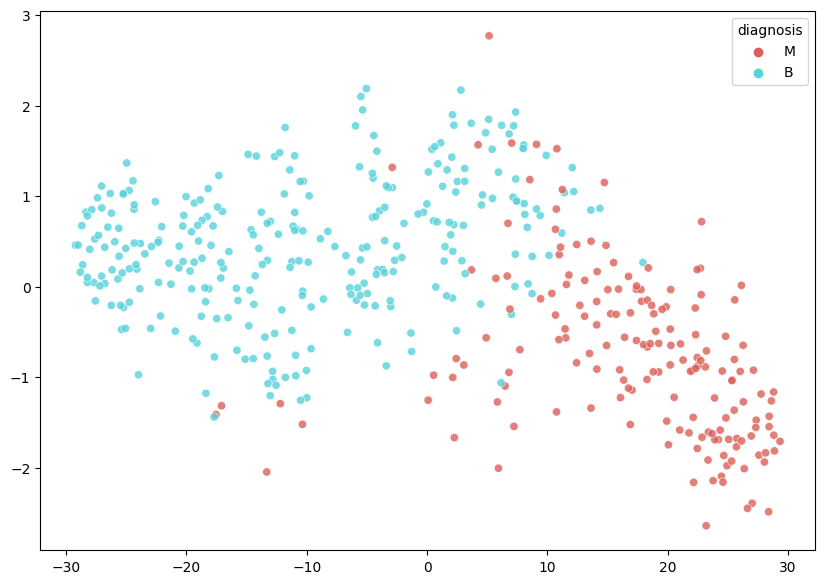

In [28]:
plt.rcParams["figure.figsize"] = (10,7)
sns.scatterplot(x=embedding_train[:,0], y=embedding_train[:,1], palette=sns.color_palette("hls", 2), hue=y_train, alpha=0.8);

In [32]:
embedding_test = embedding_train.transform(X_test)

===> Finding 15 nearest neighbors in existing embedding using exact search...
   --> Time elapsed: 0.03 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 761.9288, 50 iterations in 3.7465 sec
Iteration  100, KL divergence 761.9405, 50 iterations in 3.4605 sec
Iteration  150, KL divergence 761.9404, 50 iterations in 2.7095 sec
Iteration  200, KL divergence 761.9404, 50 iterations in 3.3219 sec
Iteration  250, KL divergence 761.9404, 50 iterations in 2.6538 sec
   --> Time elapsed: 15.89 seconds


In [33]:
start = time.time()
knn = KNeighborsClassifier().fit(embedding_train, y_train)
y_pred = knn.predict(embedding_test)
f_1_score = f1_score(y_test, y_pred, average='weighted')
end = time.time()
print('Затрачено времени: ', end - start)
print('f-score', f_1_score)

Затрачено времени:  0.020937204360961914
f-score 0.9285290148448043


In [35]:
pca = PCA(svd_solver='full', n_components=0.95)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [36]:
start = time.time()
knn = KNeighborsClassifier().fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
f_1_score = f1_score(y_test, y_pred, average='weighted')
end = time.time()
print('Затрачено времени: ', end - start)
print('f-score', f_1_score)

Затрачено времени:  0.01871204376220703
f-score 0.8739612188365653


In [37]:
start = time.time()
knn = KNeighborsClassifier(metric='manhattan').fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
f_1_score = f1_score(y_test, y_pred, average='weighted')
end = time.time()
print('Затрачено времени: ', end - start)
print('f-score', f_1_score)

Затрачено времени:  0.021401166915893555
f-score 0.8739612188365653


In [38]:
start = time.time()
knn = KNeighborsClassifier(metric='chebyshev').fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
f_1_score = f1_score(y_test, y_pred, average='weighted')
end = time.time()
print('Затрачено времени: ', end - start)
print('f-score', f_1_score)

Затрачено времени:  0.0250091552734375
f-score 0.8739612188365653
